In [112]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
from sklearn.metrics import mean_squared_error
from math import sqrt

In [113]:
prices_dataset =  pd.read_csv('paramdatasetlstm.csv', header=0)
prices_dataset.head()
param=prices_dataset.iloc[:2470,1:11]
param = np.array(param).reshape(2470,10)
result=prices_dataset.iloc[:2470,11]
result = np.array(result).reshape(2470,1)

In [92]:
n1 = param.shape[0]
p1 = param.shape[1]
n2 = result.shape[0]
p2 = result.shape[1]
# dataset = dataset.values
#print(n1,n2)

In [93]:
train_start = 0
train_end = int(np.floor(0.8*n1))
test_start = train_end
test_end = n1
param_train = param[np.arange(train_start, train_end), :]
# print(data_train)
param_test = param[np.arange(test_start, test_end), :]

train_start = 0
train_end = int(np.floor(0.8*n2))
test_start = train_end
test_end = n2

result_train = result[np.arange(train_start, train_end), :]
# print(data_train)
result_test = result[np.arange(test_start, test_end), :]
our_result = result[np.arange(test_start, test_end), :]

In [94]:
param_train.shape

(1976, 10)

In [95]:
param_test.shape

(494, 10)

In [96]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
#print(param_train)

scaler = MinMaxScaler()
scaler.fit(param_train)
scaler.fit(param_test)
scaler.fit(result_train)
scaler.fit(result_test)

param_train = scaler.transform(param_train)
param_test = scaler.transform(param_test)
result_train = scaler.transform(result_train)
result_test = scaler.transform(result_test)
# Build X and y
X_train = param_train
y_train = result_train
X_test = param_test
y_test = result_test

#print(len(X_test),len(y_test))


In [97]:
X_train.shape
#y_test.shape

(1976, 10)

In [98]:
y_train.shape

(1976, 1)

In [99]:
X_test.shape

(494, 10)

In [100]:
y_test.shape

(494, 1)

In [101]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [102]:
X_train.shape
#layers=['1409','1','4']

(1976, 1, 10)

In [103]:
from keras import optimizers

In [104]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, 10), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, input_shape=(1, 10), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))        
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [105]:
model.fit(
    X_train,
    y_train,
    batch_size=64,
    nb_epoch=100,
    validation_split=0.1)

C:\Users\Saloni\Anaconda3\envs\my_flask_env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1778 samples, validate on 198 samples
Epoch 1/100
1778/1778 [==============================] - 5s 3ms/step - loss: 1.1618 - acc: 0.0000e+00 - val_loss: 2.6907 - val_acc: 0.0000e+00
Epoch 2/100
1778/1778 [==============================] - 0s 155us/step - loss: 0.4277 - acc: 0.0000e+00 - val_loss: 0.4030 - val_acc: 0.0000e+00
Epoch 3/100
1778/1778 [==============================] - 0s 155us/step - loss: 0.0612 - acc: 0.0000e+00 - val_loss: 0.2033 - val_acc: 0.0000e+00
Epoch 4/100
1778/1778 [==============================] - 0s 160us/step - loss: 0.0363 - acc: 0.0000e+00 - val_loss: 0.0512 - val_acc: 0.0000e+00
Epoch 5/100
1778/1778 [==============================] - 0s 155us/step - loss: 0.0323 - acc: 0.0000e+00 - val_loss: 0.0458 - val_acc: 0.0000e+00
Epoch 6/100
1778/1778 [==============================] - 0s 153us/step - loss: 0.0270 - acc: 0.0000e+00 - val_loss: 0.0300 - val_acc: 0.0000e+00
Epoch 7/100
1778/1778 [==============================] - 0s 153us/step - loss: 0.0260

Epoch 57/100
1778/1778 [==============================] - 0s 171us/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 58/100
1778/1778 [==============================] - 0s 178us/step - loss: 0.0094 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 59/100
1778/1778 [==============================] - 0s 179us/step - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 60/100
1778/1778 [==============================] - 0s 161us/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 61/100
1778/1778 [==============================] - 0s 171us/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 62/100
1778/1778 [==============================] - 0s 183us/step - loss: 0.0081 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 63/100
1778/1778 [==============================] - 0s 174us/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.0017 

In [106]:
# print(X_test, y_test)
trainPredict = model.predict(X_test, batch_size=10)
trainPredict = scaler.inverse_transform(trainPredict)
y_test = scaler.inverse_transform(y_test)
new_predict =[]
new_y_test =[]
for i in range(0,len(trainPredict)):
    new_predict.append(trainPredict[i][0])
for i in range(0,len(y_test)):
    new_y_test.append(y_test[i][0])
print(new_predict)
print(new_y_test)

[20173.639, 19957.979, 19678.32, 19478.957, 19485.344, 19186.357, 18892.842, 18789.326, 18852.06, 18753.457, 18904.127, 19013.799, 19080.166, 18861.922, 18813.225, 18738.479, 18639.709, 18325.61, 18294.328, 18374.432, 18109.201, 17983.48, 17830.955, 17747.457, 17695.453, 17780.127, 18098.234, 18135.664, 18047.621, 18347.229, 18240.35, 18488.998, 18534.844, 18560.34, 18209.176, 18016.223, 17982.48, 18256.2, 18229.486, 18358.084, 18183.42, 18350.443, 18434.914, 18596.38, 18528.023, 18634.42, 18291.588, 18347.031, 18229.125, 18155.875, 18004.475, 18019.805, 18152.865, 18283.201, 18450.139, 18678.195, 18786.188, 19039.395, 19321.932, 19448.191, 19655.234, 19698.85, 19712.854, 19626.912, 19564.586, 19433.719, 19580.115, 19401.914, 19253.389, 19128.97, 19259.988, 19339.207, 19351.617, 19403.232, 19430.115, 19211.398, 19226.016, 19232.523, 18957.283, 18714.531, 18424.076, 18466.318, 18399.428, 18353.268, 18397.934, 18281.557, 18388.516, 18440.293, 18337.52, 18372.178, 18257.457, 18313.611, 18

In [107]:
def error_function(test_y, predicted_y):
    import numpy as np
    from math import sqrt
    test = list(test_y)
    #print (test[1]-predicted_y[1])
    MAPE=[(test[i]-predicted_y[i])/test[i] for i in range(len(test))]
    MAPE1=abs((sum(MAPE)*100/len(test)))
    MAE=abs((sum(MAPE)/len(test)))
    rRMSE=[((test[i]-predicted_y[i])/test[i])**2 for i in range(len(test))]
    rRMSE=sqrt(sum(rRMSE)/len(test))
    MSE=[(test[i]-predicted_y[i])**2 for i in range(len(test))]
    MSE=sum(MSE)/len(test)
    #print(MSE)
    return MAPE1,MAE,rRMSE,MSE

In [108]:
print("\t MAPE\t\t\tMAE\t\t\trRMSE\t\t\tMSE")
print(error_function( new_y_test,new_predict))

	 MAPE			MAE			rRMSE			MSE
(0.42767415428867706, 0.004276741542886771, 0.010223104467429594, 31012.106199497972)


In [109]:
p = model.predict(X_test)
p = scaler.inverse_transform(p)
#print(p)

In [110]:
param_test = scaler.inverse_transform(param_test)
result_test = our_result

#print (param_test)
#print (result_test)

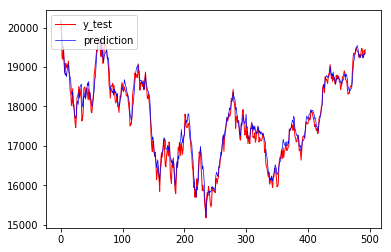

In [111]:
import matplotlib.pyplot as plt2

plt2.plot(new_y_test,color='red', label='y_test',linewidth='1.0')
plt2.plot(new_predict,color='blue', label='prediction',linewidth='0.7')
plt2.legend(loc='upper left')
plt2.show()